In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [3]:
#Reading Fake News Data
fake=pd.read_csv("/Users/rushikeshjoshi/Desktop/Python/Data Sets/Project/Fake News /Fake.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
#Checking Null Values
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [6]:
#Counting By Subject
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

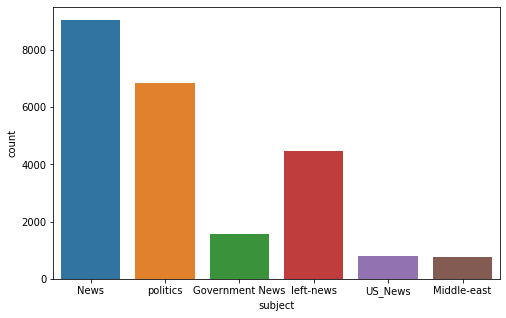

In [7]:
#Plotting Subject Wise News
plt.figure(figsize=(8,5))
sns.countplot("subject",data=fake)
plt.show()

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
from wordcloud import WordCloud

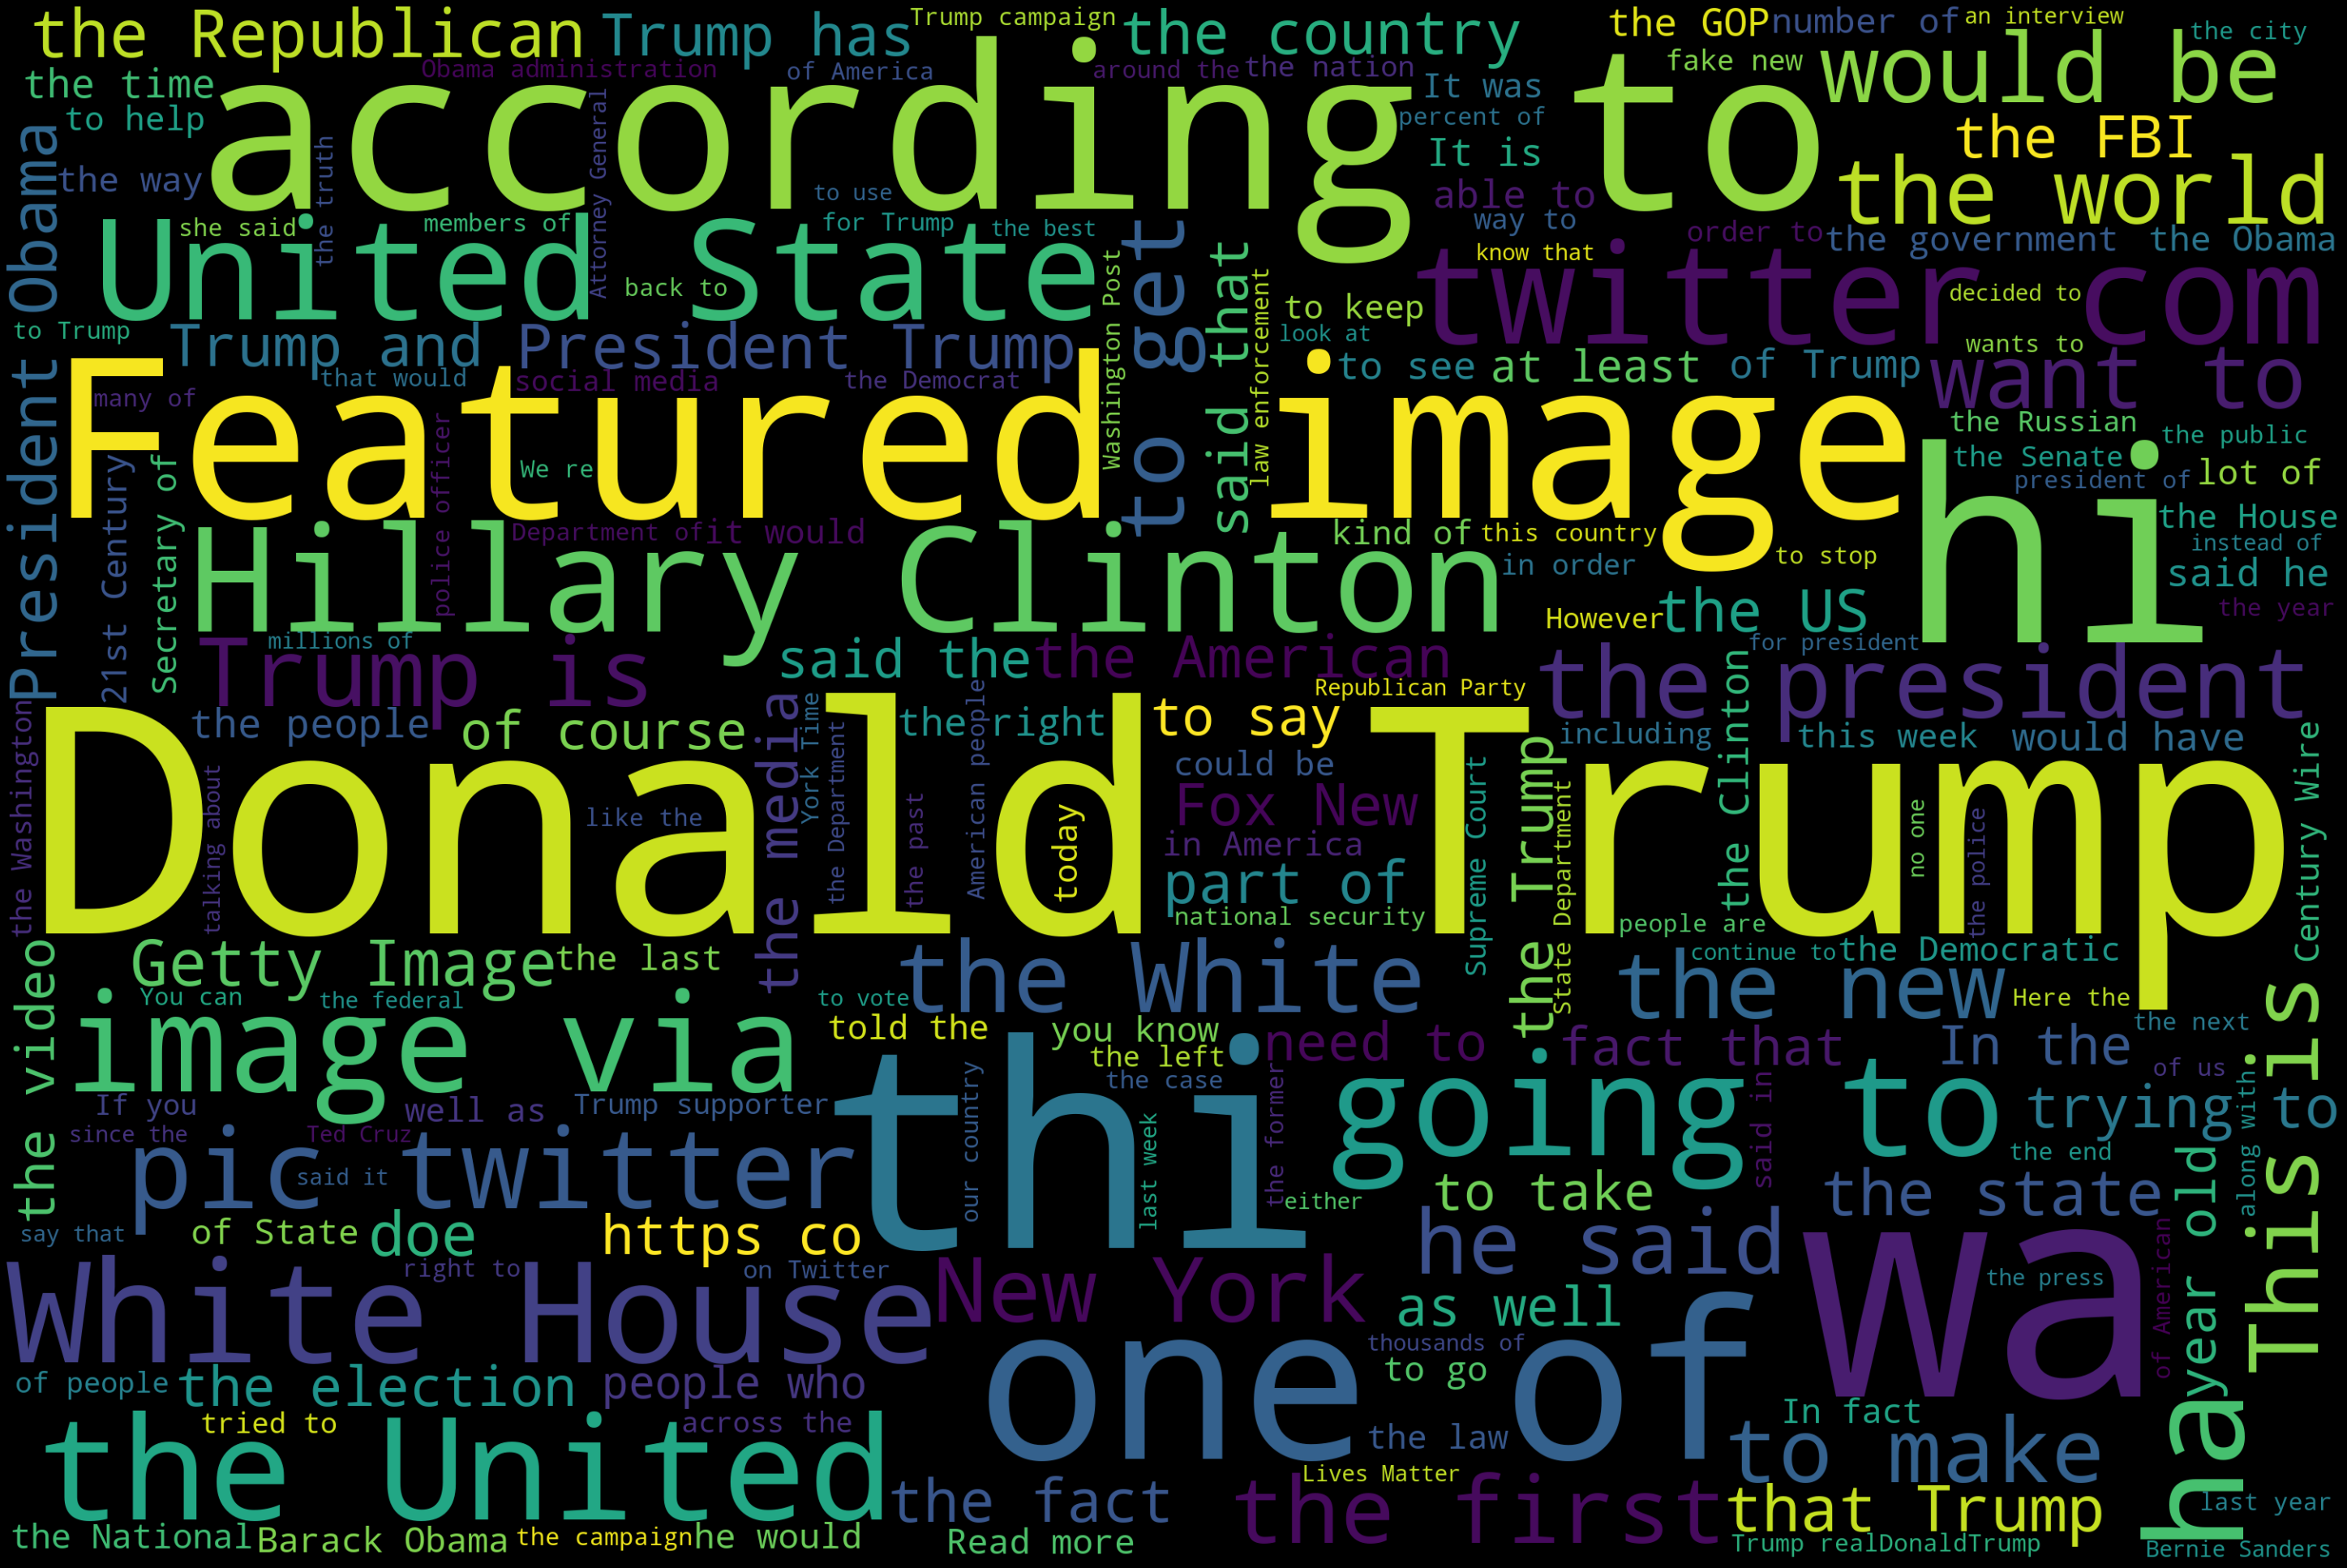

In [10]:
#Creating Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# **Exploring Real News Data**

In [11]:
#Reading Real News Data
real=pd.read_csv("/Users/rushikeshjoshi/Desktop/Python/Data Sets/Project/Fake News /True.csv")
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

## Difference in a Text
### Real news seems to have source of publication which is not present in fake news set

## Looking at the data:

#### most of text contains reuters information such as "WASHINGTON (Reuters)".
#### Some text are tweets from Twitter
#### Few text do not contain any publication info

### Cleaning Data
#### Removing Reuters or Twitter Tweet information from the text

##### Text can be splitted only once at " - " which is always present after mentioning source of publication, this gives us publication part and text part
##### If we do not get text part, this means publication details was't given for that record
##### The Twitter tweets always have same source, a long text of max 259 characters

In [12]:
#Subject Wise Counting
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [13]:
#Use of Enumerate
#grocery=['Biscuit','Vegitable','Eggs']
#enumerate_grocery=enumerate(grocery)
#print(list(enumerate_grocery))

In [14]:
#First Creating list of index that do not have publication part

unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)


In [15]:
#Thus we have list of indices where publisher is not mentioned
#lets check
real.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [16]:
#record=row.split(" -",maxsplit=1)
#record[1]

While looking at texts that do not contain publication info such as which reuter, we noticed one thing.

**Text at index 8970 is empty**

In [17]:
real.iloc[8970]
#We will remove this one

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [18]:
#Separating source of publication from text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [19]:
#Replace existing text column with new text
#Adding new column 'publisher' 
real["publisher"]=publisher
real["text"]=tmp_text

In [20]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0   The head of a conservative Republican faction...  politicsNews   
1   Transgender people will be allowed for the fi...  politicsNews   
2   The special counsel investigation of links be...  politicsNews   
3   Trump campaign adviser George Papadopoulos to...  politicsNews   
4   President Donald Trump called on the U.S. Pos...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

New Column Publisher has been added

In [21]:
#checking for rows with empty text like row:8970
[index for index,text in enumerate(real.text.values) if str(text).strip()==""]
#Seems only one row is empty

[8970]

In [22]:
#Dropping empty row
real=real.drop(8970,axis=0)

In [23]:
#Checking empty rows for fake news
empty_fake_index=[index for index,text in enumerate(fake.text.values) if str(text).strip()==""]
print("No of empty rows :", len(empty_fake_index))

No of empty rows : 630


**630 Rows in Fake news with empty text**

Also noticed fake news have a lot of CPATIAL-CASES. We will contert to lower case.

The text for these rows seems to be present in title itself. Lets merge title and text to solve these cases.

In [25]:
#counting subject wise news
print(f"Total records:\t{real.shape[0]}")# formatted string
for key,count in real.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")


Total records:	21416
politicsNews:	11271
worldnews:	10145


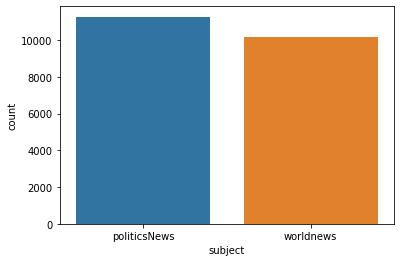

In [26]:
sns.countplot(x='subject',data=real)
plt.show()

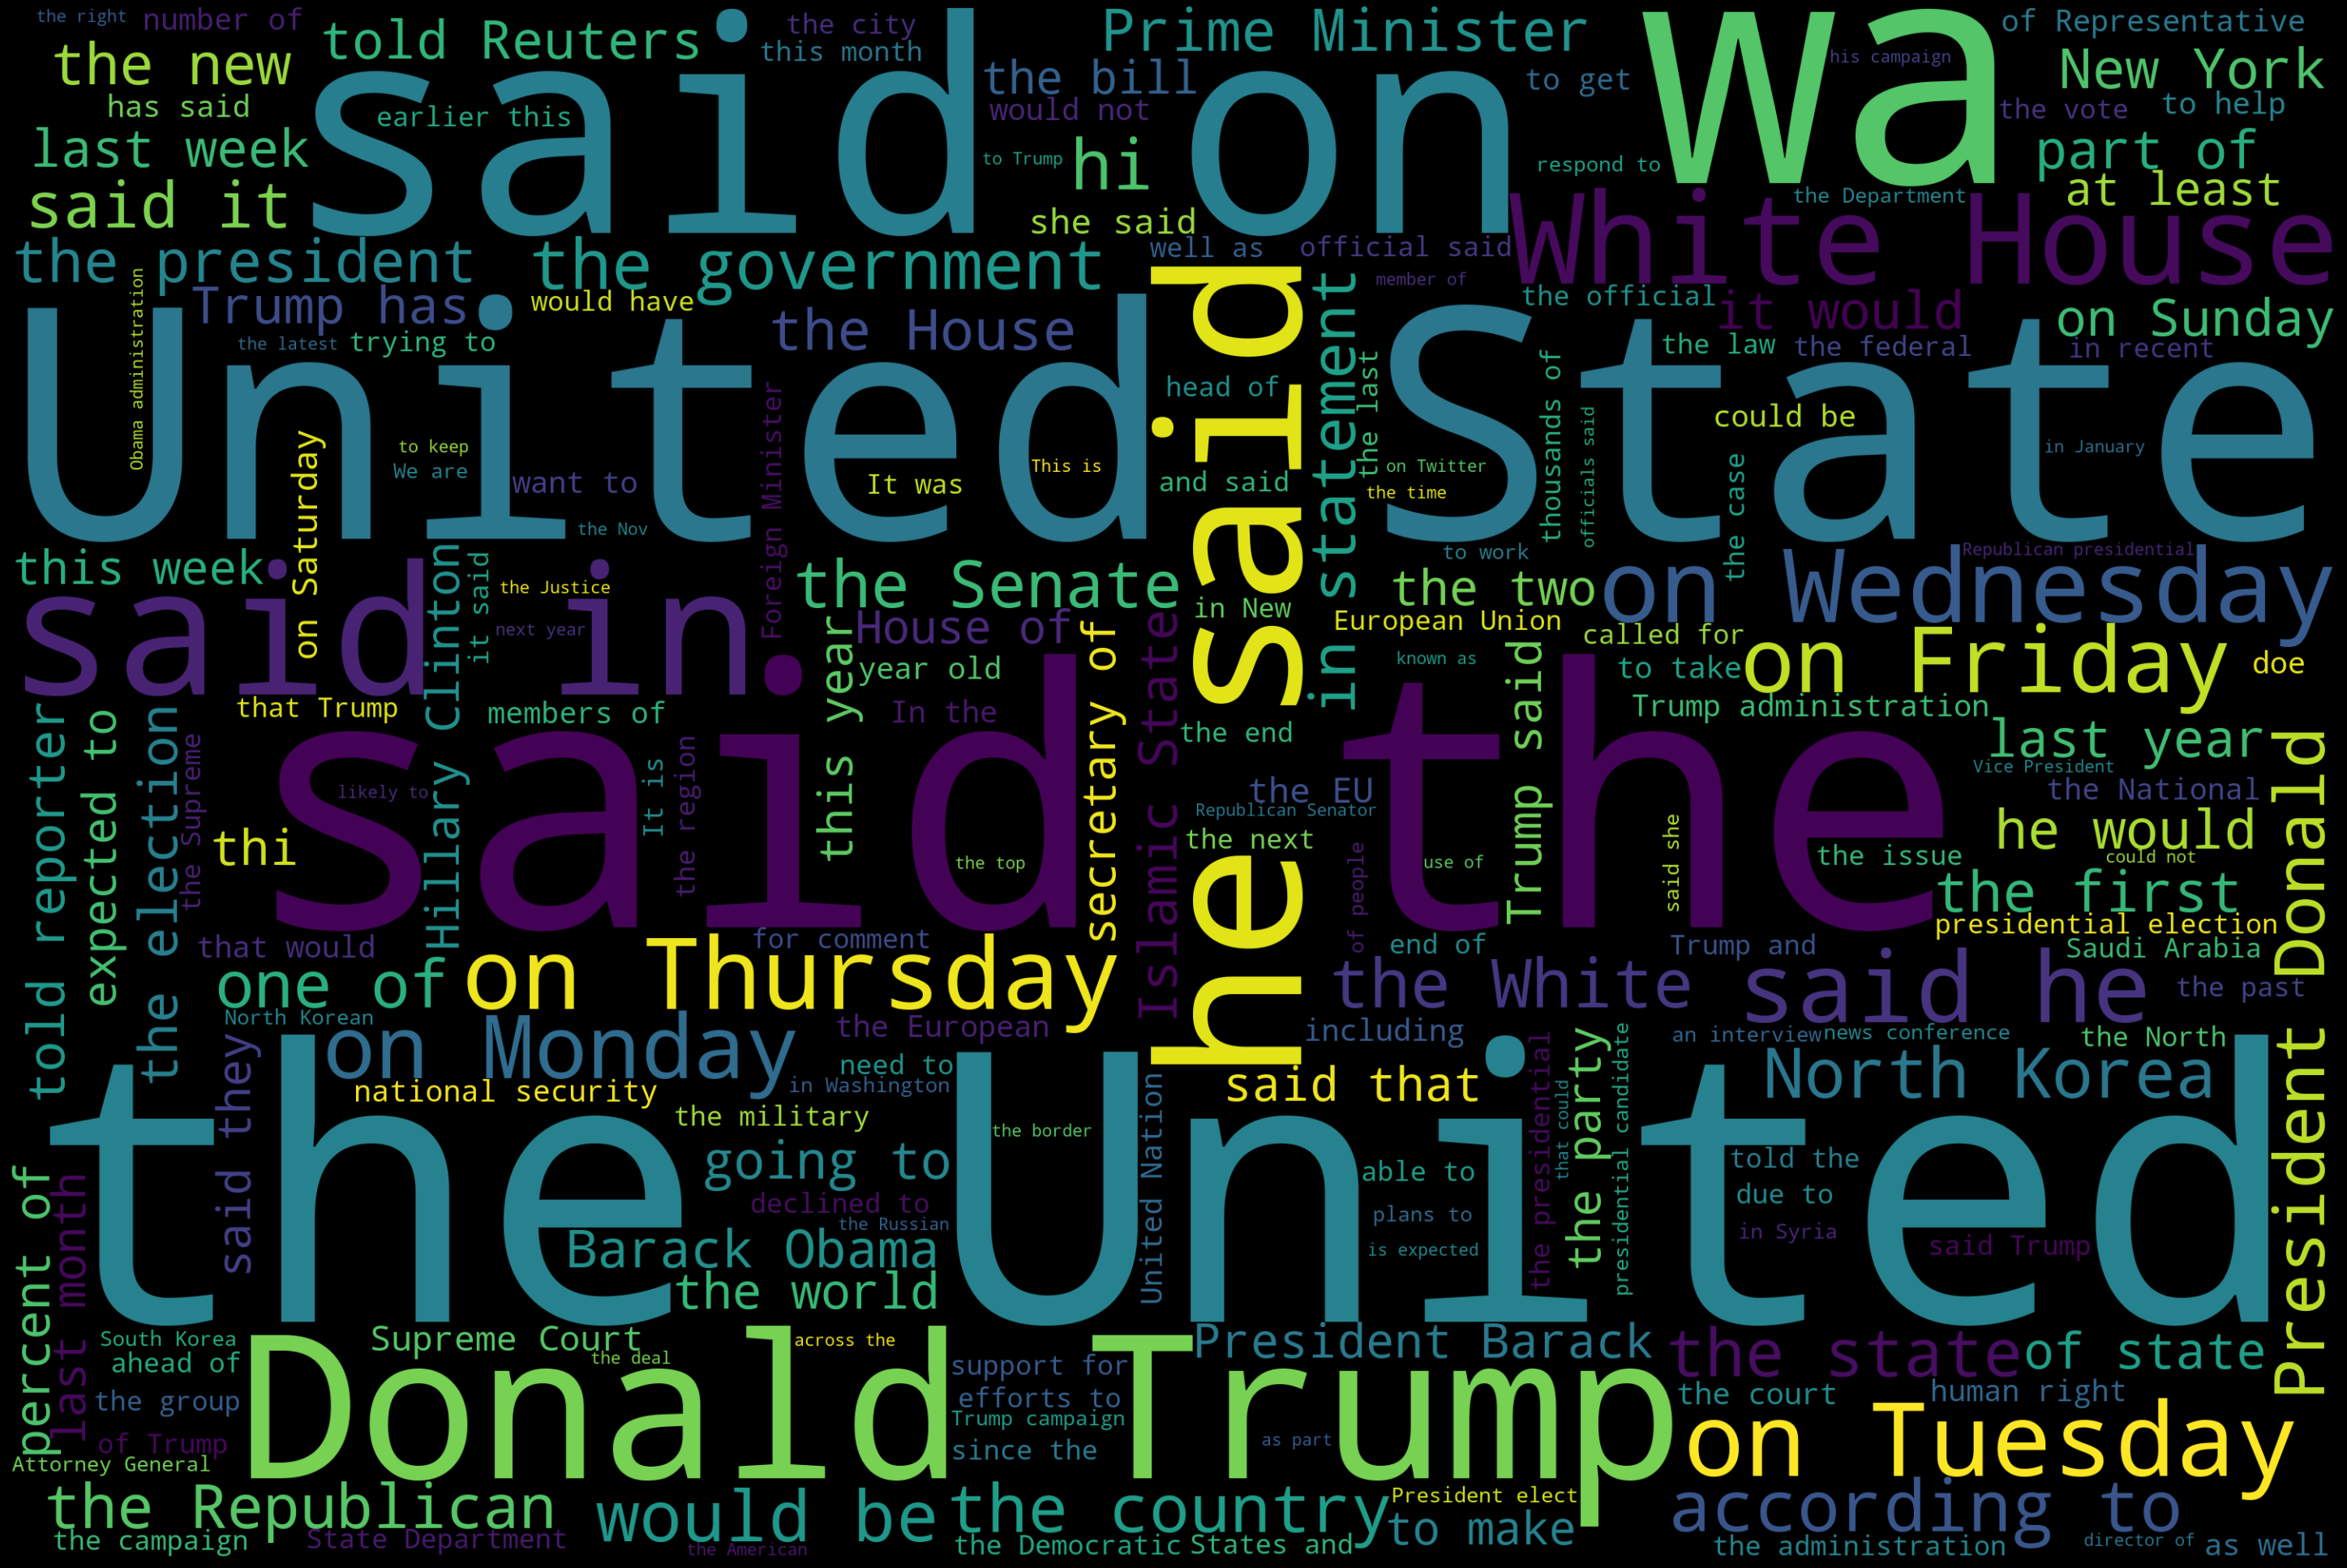

In [27]:
#Word Cloud for real news 
text = ''
for news in real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# Preprocessing Text

In [28]:
#Adding Class information
real["class"]=1
fake["class"]=0

In [29]:
#Combining text and title
real["text"]=real["title"]+" "+real["text"]
fake["text"]=fake["title"]+" "+fake["text"]

In [30]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  As U.S. budget fight looms, Republicans flip t...  politicsNews   
1  U.S. military to accept transgender recruits o...  politicsNews   
2  Senior U.S. Republican senator: 'Let Mr. Muell...  politicsNews   
3  FBI Russia probe helped by Australian diplomat...  politicsNews   
4  Trump wants Postal Service to charge 'much mor...  politicsNews   

                 date                     publisher  class  
0  December 31, 2017           WASHINGTON (Reuters)      1  
1  December 29, 2017           WASHINGTON (Reuters)      1  
2  December 31, 2017           WASHINGTON (Reuters)      1  
3  December 30, 2017           WASHINGTON (Reuters)      1  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)      1

In [31]:
# Subject is diffrent for real and fake thus dropping it
# Also dropping Date, title and Publication Info of real
real=real.drop(['subject','date','publisher','title'],axis=1)
fake=fake.drop(['subject','date','title'],axis=1)

In [32]:
real.head()

text  class
0  As U.S. budget fight looms, Republicans flip t...      1
1  U.S. military to accept transgender recruits o...      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...      1
3  FBI Russia probe helped by Australian diplomat...      1
4  Trump wants Postal Service to charge 'much mor...      1

In [33]:
fake.head()

text  class
0   Donald Trump Sends Out Embarrassing New Year’...      0
1   Drunk Bragging Trump Staffer Started Russian ...      0
2   Sheriff David Clarke Becomes An Internet Joke...      0
3   Trump Is So Obsessed He Even Has Obama’s Name...      0
4   Pope Francis Just Called Out Donald Trump Dur...      0

In [34]:
#Combining fake and real data into new data set
data=real.append(fake,ignore_index=True)

In [35]:
data.shape

(44897, 2)

In [36]:
data.head()

text  class
0  As U.S. budget fight looms, Republicans flip t...      1
1  U.S. military to accept transgender recruits o...      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...      1
3  FBI Russia probe helped by Australian diplomat...      1
4  Trump wants Postal Service to charge 'much mor...      1

In [38]:
data.text=data.text.str.lower()

In [39]:
def process_text(s):

    # Check string to see if they are a punctuation
    nopunc = [char for char in s if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert string to lowercase and remove stopwords
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [45]:
import string
from nltk.corpus import stopwords



In [46]:
data['Clean Text'] = data['text'].apply(process_text)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
bow_transformer=CountVectorizer(analyzer=process_text).fit(data['Clean Text'])

In [49]:
len(bow_transformer.vocabulary_)



39098

In [50]:
data_bow=bow_transformer.transform(data['Clean Text'])

In [51]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.naive_bayes import MultinomialNB

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(data_bow)
news_tfidf = tfidf_transformer.transform(data_bow)
print(news_tfidf.shape)

(44897, 39098)


In [53]:
fakenews_detect_model = MultinomialNB().fit(news_tfidf, data['class'])

In [54]:
#Model Evaluation
predictions = fakenews_detect_model.predict(news_tfidf)
print(predictions)

[1 1 1 ... 0 0 0]


In [55]:
from sklearn.metrics import classification_report
print (classification_report(data['class'], predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23481
           1       1.00      1.00      1.00     21416

    accuracy                           1.00     44897
   macro avg       1.00      1.00      1.00     44897
weighted avg       1.00      1.00      1.00     44897



In [56]:
news_train, news_test, text_train, text_test = train_test_split(data['text'], data['class'], test_size=0.3)

In [57]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



In [58]:
pipeline.fit(news_train,text_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7fe10e6cf320>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [59]:
predictions = pipeline.predict(news_test)

In [60]:
print(classification_report(predictions,text_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6945
           1       0.96      0.95      0.96      6525

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



In [62]:
from sklearn.metrics import confusion_matrix 



In [63]:
tab1=confusion_matrix (predictions,text_test)
tab1

array([[6698,  247],
       [ 315, 6210]])

In [64]:
tab1.diagonal().sum()/tab1.sum()*100#Accuracy
#Accuaracy is high beacuse NB uses conditional probability p(A/B)

95.82776540460281